In [3]:
# Монтируем диск
from google.colab import drive
drive.mount('/content/gdrive')
# подключаем kaggle.json
from google.colab import files
files.upload()


Mounted at /content/gdrive


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"egorkeen","key":"09e9bff890e6c6e423cfb55723bbf62d"}'}

In [7]:
# устанавливаем Kaggle API Client
!pip install -q kaggle

In [8]:
# создаем папку .kaggle и помещаем туда kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
# предоставляем права на чтение файла
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# скачиваем данные
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 34.1MB/s]


In [11]:
# распаковываем архив
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [12]:
# Уберем предупреждения, чтобы они не загромождали вывод

import warnings
warnings.filterwarnings('ignore')

In [13]:
# импортируем pandas
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
df = df.drop("car_ID", axis=1) # можно также использовать df.drop("car_ID", axis=1, inplace=True)
df.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [16]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
len(categorical_cols), categorical_cols

(10,
 ['CarName',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'])

In [17]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns.tolist()
len(numerical_cols), numerical_cols

(15,
 ['symboling',
  'wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg',
  'price'])

In [18]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [19]:
# перемещаем колонку symboling
categorical_cols.append("symboling")
len(categorical_cols), categorical_cols

(11,
 ['CarName',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem',
  'symboling'])

In [20]:
numerical_cols.remove("symboling")
len(numerical_cols), numerical_cols

(14,
 ['wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg',
  'price'])

In [21]:
# Также удалим колонку с ценой, это будет наша целевая переменная

target_col = "price"
numerical_cols.remove("price")
len(numerical_cols), numerical_cols

(13,
 ['wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg'])

In [22]:
# Проверим, что никакие колонки не потерялись

df.shape[1] - 1 == len(categorical_cols) + len(numerical_cols)

True

In [23]:
# делим колонку с названиями автомобилей на две составные
car_names = df['CarName'].str.split(' ', expand=True)
df["car_company"] = car_names[0]

for i in range(1, car_names.shape[1] - 1):
  df["car_model_{}". format(i)] = car_names[i].fillna("-") # сразу заполним пропущенные значения прочерком

df[["car_company"] + ["car_model_{}". format(i) for i in range(1, car_names.shape[1] - 1)]]

,car_company,car_model_1,car_model_2,car_model_3
0,alfa-romero,giulia,-,-
1,alfa-romero,stelvio,-,-
2,alfa-romero,Quadrifoglio,-,-
3,audi,100,ls,-
4,audi,100ls,-,-
...,...,...,...,...
200,volvo,145e,(sw),-
201,volvo,144ea,-,-
202,volvo,244dl,-,-
203,volvo,246,-,-


In [24]:
# Удалим старую колонку с объединенными названиями

df = df.drop("CarName", axis=1)
df.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model_1,car_model_2,car_model_3
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,-,-
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,-,-
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,-,-


In [25]:
# Удалим колонку CarName из списка категориальных колонок и добавим туда наши новые колонки

categorical_cols.remove("CarName")
categorical_cols.extend(["car_company"] + ["car_model_{}". format(i) for i in range(1, car_names.shape[1] - 1)])
len(categorical_cols), categorical_cols

(14,
 ['fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem',
  'symboling',
  'car_company',
  'car_model_1',
  'car_model_2',
  'car_model_3'])

In [26]:
# Проверим, что никакие колонки не потерялись

df.shape[1] - 1 == len(categorical_cols) + len(numerical_cols)

True

In [28]:
# проверим, что в названии компаний - производителей автомобилей
# нет разных обозначений одной и той же компании

df["car_company"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [29]:
# Приведем названия к единообразию

df["car_company"] = df["car_company"].replace(
    {
        "maxda": "mazda",
        "porcshce": "porsche",
        "Nissan": "nissan",
        "vokswagen": "volkswagen",
        "vw": "volkswagen",
        "toyouta": "toyota",
      }
)
df["car_company"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

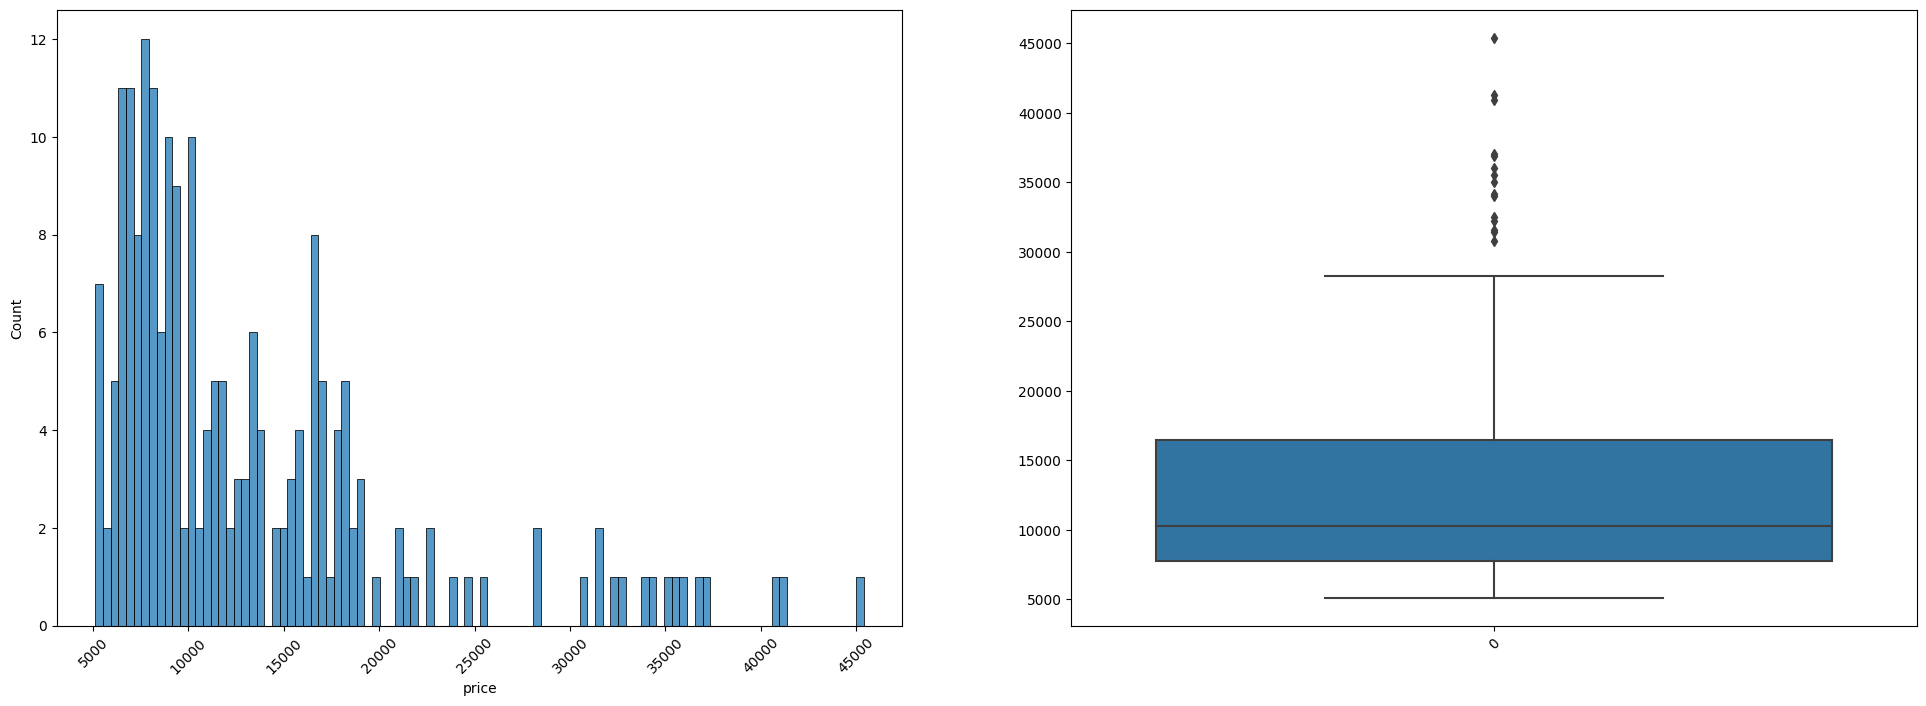

In [30]:
# Визуализируем нашу целевую переменную

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.histplot(df[target_col], bins=100);

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(df[target_col]);

In [31]:
# Предобработка данных

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("price", axis=1),
    df["price"],
    test_size=0.33,
    random_state=42
)

In [32]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_company         0
car_model_1         0
car_model_2         0
car_model_3         0
dtype: int64

In [33]:
# Нормализация численных признаков

from sklearn.preprocessing import StandardScaler

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num.shape, X_test_num.shape, X_train_num_scaled.shape, X_test_num_scaled.shape, len(numerical_cols)

((137, 13), (68, 13), (137, 13), (68, 13), 13)

In [34]:
# Кодирование категориальных признаков

from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = np.empty(X_train[categorical_cols].shape, int)
X_test_cat = np.empty(X_test[categorical_cols].shape, int)

for j, col in enumerate(categorical_cols):
  X_train_cat[:, j] = encoder.fit_transform(X_train[col].values.reshape(-1, 1))[:, 0]
  X_test_cat[:, j] = encoder.transform(X_test[col].values.reshape(-1, 1))[:, 0]

X_train_cat.shape, X_test_cat.shape, len(categorical_cols)

((137, 14), (68, 14), 14)

In [35]:
X_train_new = np.hstack((X_train_num, X_train_cat))
X_test_new = np.hstack((X_test_num, X_test_cat))
X_train_new.shape, X_test_new.shape

((137, 27), (68, 27))

In [36]:
X_train_new_scaled = np.hstack((X_train_num_scaled, X_train_cat))
X_test_new_scaled = np.hstack((X_test_num_scaled, X_test_cat))
X_train_new_scaled.shape, X_test_new_scaled.shape

((137, 27), (68, 27))

In [37]:
# Инициализация модели линейной регрессии
import numpy as np

np.random.seed(42) # зафиксируем состояние для воспроизводимости результатов

In [38]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train_new_scaled, y_train)

LinearRegression()

In [43]:
# импортируем R^2 метрику для оценки качества модели
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
pred_lr = lr.predict(X_test_new_scaled) # получение предсказаний
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 3)))

MSE = 13769282.285; R2 = 0.79


In [45]:
# подбор гиперпараметров

from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="neg_mean_squared_error", cv=5):
  """Перебор всевозможных гиперпараметров.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param model: модель, для которой производится подбор гиперпараметров
  :param params: словарь с названиями гиперпараметрамов и всеми наборами значений
  :param scoring: функция, которая будет минимизироваться в ходе кросс-валидации
  :param cv: количество частей, на которые будет поделена выборка

  :return: наилучшие гиперпараметры
  """
  searcher = GridSearchCV(
      model,
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_

  print("Best hyperparameters:", best_params)
  return best_params

In [46]:
best_params_lr = gridsearch(
    X_train_new_scaled, y_train,
    LinearRegression(),
    {
        "fit_intercept": [True, False], # default = True
        "positive": [True, False], # default = False
    }
)

Best hyperparameters: {'fit_intercept': False, 'positive': False}


In [47]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 3)))

  return pred, mse, r2

In [48]:
pred_lr, mse_lr, r2_lr = model_train_test(
    X_train_new_scaled,
    y_train,
    X_test_new_scaled,
    y_test,
    LinearRegression(**best_params_lr)
)

MSE = 13902047.68; R2 = 0.788


In [49]:
from sklearn.linear_model import Ridge, Lasso

In [50]:
best_params_ridge = gridsearch(
    X_train_new_scaled, y_train,
    Ridge(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-3
    }
)

pred_ridge, mse_ridge, r2_ridge = model_train_test(
    X_train_new_scaled,
    y_train,
    X_test_new_scaled,
    y_test,
    Ridge(**best_params_ridge)
)

Best hyperparameters: {'alpha': 5.623413251903491, 'tol': 1e-05}
MSE = 12796307.539; R2 = 0.804


In [51]:
best_params_lasso = gridsearch(
    X_train_new_scaled, y_train,
    Lasso(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-4

    }
)

pred_lasso, mse_lasso, r2_lasso = model_train_test(
    X_train_new_scaled,
    y_train,
    X_test_new_scaled,
    y_test,
    Lasso(**best_params_lasso)
)

Best hyperparameters: {'alpha': 31.622776601683793, 'tol': 0.01}
MSE = 11820921.208; R2 = 0.819


In [52]:
# Отсортируем значения целевой переменной и предсказания

order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
pred_lr_ordered = pred_lr[order]
pred_ridge_ordered = pred_ridge[order]
pred_lasso_ordered = pred_lasso[order]

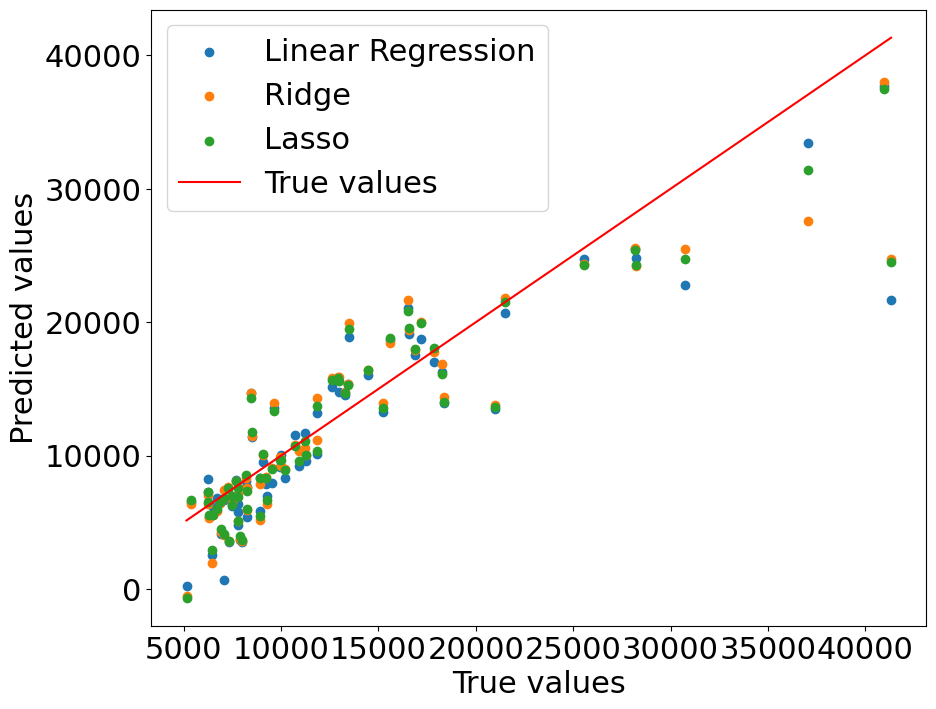

In [53]:
plt.rc('font', size=22) # далее во всех графиках будет использоваться такой же размер шрифта

plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_lr_ordered, label="Linear Regression")
plt.scatter(y_test_ordered, pred_ridge_ordered, label="Ridge")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Lasso")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

In [54]:
# Метод k-ближайших соседей

from sklearn.neighbors import KNeighborsRegressor

In [55]:
best_params_knn = gridsearch(
    X_train_new_scaled, y_train,
    KNeighborsRegressor(),
    {
        "n_neighbors": np.arange(1, 21), # default = 5
        "p": [1, 2], # default = 2
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], # default = "auto"
    }
)

pred_knn, mse_knn, r2_knn = model_train_test(
    X_train_new_scaled,
    y_train,
    X_test_new_scaled,
    y_test,
    KNeighborsRegressor(**best_params_knn)
)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
MSE = 34883609.637; R2 = 0.467


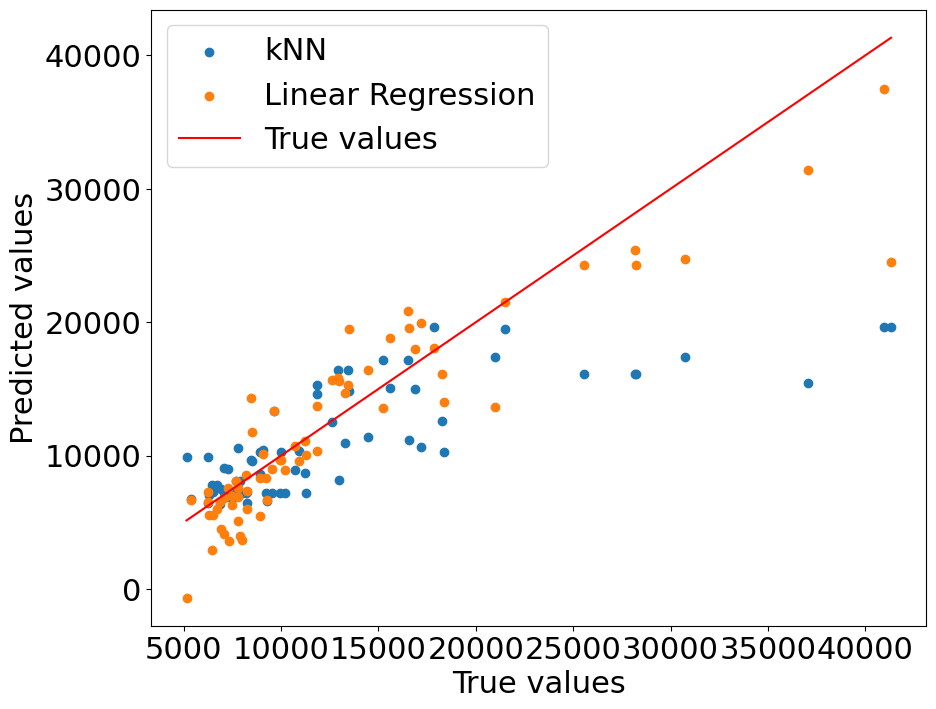

In [56]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_knn[order], label="kNN")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Linear Regression")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

In [57]:
# Решающие деревья

from sklearn.tree import DecisionTreeRegressor

In [58]:
best_params_dt = gridsearch(
    X_train_new, y_train,
    DecisionTreeRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "min_samples_leaf": [i for i in range(1, 41)], # default = 1
        "max_features": [None, "auto", "sqrt", "log2"] # default = None
    }
)

pred_dt, mse_dt, r2_dt = model_train_test(
    X_train_new,
    y_train,
    X_test_new,
    y_test,
    DecisionTreeRegressor(**best_params_dt)
)

Best hyperparameters: {'max_depth': 350, 'max_features': 'auto', 'min_samples_leaf': 2}
MSE = 8414297.826; R2 = 0.871


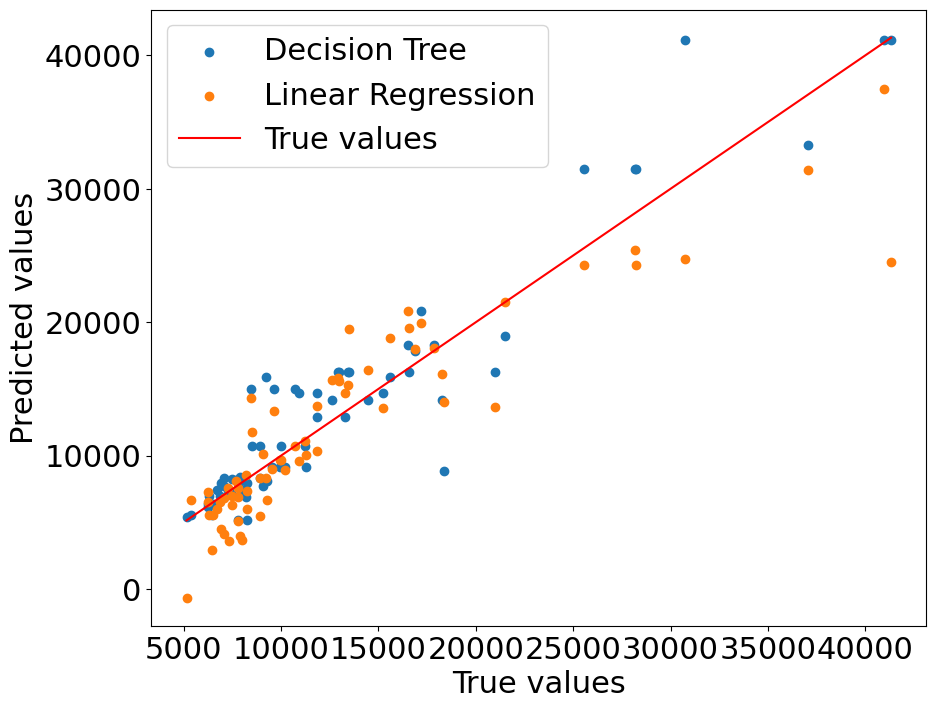

In [59]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_dt[order], label="Decision Tree")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Linear Regression")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

In [60]:
# Ансамбли моделей

from sklearn.ensemble import RandomForestRegressor

In [61]:
best_params_rf = gridsearch(
    X_train_new, y_train,
    RandomForestRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "n_estimators": [i for i in range(50, 351, 50)], # default = 100
    }
)

pred_rf, mse_rf, r2_rf = model_train_test(
    X_train_new,
    y_train,
    X_test_new,
    y_test,
    RandomForestRegressor(**best_params_rf)
)

Best hyperparameters: {'max_depth': 150, 'n_estimators': 100}
MSE = 4206115.792; R2 = 0.936


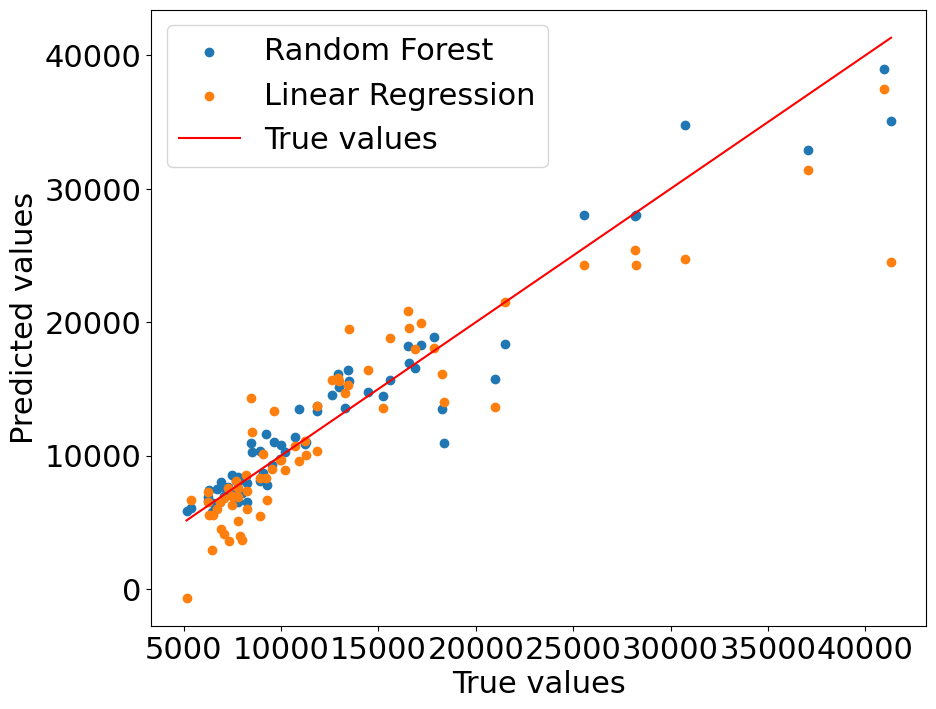

In [62]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_rf[order], label="Random Forest")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Linear Regression")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

In [63]:
ans_df = pd.DataFrame()
ans_df["Model"] = ["Linear Regression", "Ridge", "Lasso", "kNN", "Decision Tree", "Random Forest"]
ans_df["MSE"] = [mse_lr, mse_ridge, mse_lasso, mse_knn, mse_dt, mse_rf]
ans_df["R2"] = [r2_lr, r2_ridge, r2_lasso, r2_knn, r2_dt, r2_rf]

In [64]:
ans_df.sort_values(by=["MSE"], ascending=True).sort_values(by=["R2"], ascending=False)

,Model,MSE,R2
5,Random Forest,4.206116e+06,0.935721
4,Decision Tree,8.414298e+06,0.871410
2,Lasso,1.182092e+07,0.819349
1,Ridge,1.279631e+07,0.804443
0,Linear Regression,1.390205e+07,0.787545
3,kNN,3.488361e+07,0.466899
